In [1]:
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path
    
def get_test_annotations(csv_file, image_num):
    anns = csv_file.PredictionString[image_num].split(" ")
    anns = list(filter(None, anns))
    n = 6
    anns = [anns[i * n:(i + 1) * n] for i in range((len(anns) + n - 1) // n )] 
    return anns

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def plot_test_bbox(image, anns):
    for ann in anns:
        (label, score, xmin, ymin, xmax, ymax) = map(float, ann)
        c = classes[int(label)]
        # if score > 0.5:
        image = cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 0, 255), 3)
        cv2.putText(image, classes[int(label)], (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    plt.imshow(image)    

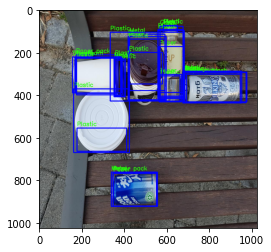

In [3]:
work_dir = '/opt/ml/detection/mmdetection/work_dirs/faster_rcnn_r50_fpn_1x_trash'
dataset_path = '/opt/ml/detection/dataset/'
epoch = 'latest'

data_frame = pd.read_csv(os.path.join(work_dir, f'submission_{epoch}.csv'))

image_num = random.randint(0, len(data_frame) - 1)
file_path = data_frame.image_id[image_num]
anns = get_test_annotations(data_frame, image_num)
image = read_image(dataset_path, file_path)
plot_test_bbox(image, anns)